In [1]:
%matplotlib inline
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# Midterm - Fall Semester 2018

Guidelines:
1. Use resources available to you from class and online.
1. That being said this is an individual effort, do not work with others and cite what you do use.
1. Copying is prohibited, write your own code and solutions.
1. Do not use campuswire for the duration of the exam!  
1. If you have a question please email the instructor and the TAs for maximal response possibilities.  We will answer questions that pertain only to clarification.
1. Late turn in of the midterm will result in a 10% reduction every HOUR that it is late.  If you feel that there is a special circumstance that warrants consideration tells us BEFORE the Tuesday (and more so before the exam starts).

Good luck!

## Question 1

Consider the three following three points:
$$
    x_i, x_i + \frac{\Delta x}{3}, ~\text{and}~ x_i + \frac{\Delta x}{2}.
$$

**(a)** [10] Derive a finite difference approximation to the first derivative of maximal order with these points.  Also determine the leading error term.

YOUR ANSWER HERE

**(b)** [10] Derive a quadrature rule using the same points again defining the weights such that the resulting rule is of maximal order.

YOUR ANSWER HERE

**(c)** [5] Confirm the order of convergence for both methods you derived by plotting the results vs. an expected convergence rate.  Make sure to define your "sense" of error and pick an appropriate test function to demonstrate the convergence.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Question 2

Bernoulli's equation for fluid flow in an open channel with a small bump is
$$
    \frac{F^2}{2 g w^2 h_0^2} + h_0 = \frac{F^2}{2 g w^2 h^2} + h + H
$$
where $F$ is the volume of rate flow ($m^3/s$), $g$ is gravitational acceleration ($m/s^2$), $w$ the width of the channel ($m$), $h_0$ the upstream water level ($m$), $H$ the height of the bump ($m$), and $h$ is the water level above the bump ($m$).  

**(a)** [6] We are trying to find the value $h$ given the values $F, g, w, h_0, ~\text{and}~ H$ using a root finding procedure.  Reformulate Bernoulli's equation so that the problem has the form required to treat it as a root finding problem.  We will also eventually want to apply Newton's method so also find the derivative that we will need to use.  For this case use the following values as constants:
$$
    F=1.2, g=9.81, w=2.5, h_0=2.3, H=1.0
$$


Answer:
$$
(\frac{F^2}{2 g w^2 h_0^2} + h_0)h^2  = \frac{F^2}{2 g w^2 } + h^3 + Hh^2 \\
h^3 + (H - \frac{F^2}{2 g w^2 h_0^2} - h_0 )h^2  +  \frac{F^2}{2 g w^2 }  = 0 \\
f(h) = h^3 + (H - \frac{F^2}{2 g w^2 h_0^2} - h_0 )h^2  +  \frac{F^2}{2 g w^2 } \\
f'(h) = 3h^2 + 2 (H - \frac{F^2}{2 g w^2 h_0^2} - h_0 ) h
$$

**(b)** [7] Write a set of functions that use the bisection method and Newton's method to find the roots of the functions you formulated in part (a).  Make sure to handle the case where the method does not converge.

In [48]:
F=1.2
g=9.81
w=2.5
h_0=2.3
H=1.0

C0 = (F**2) / (2*g*(w**2))
C2 = H - C0 / (h_0**2) - h_0

def f(h):
    return h**3 + C2 * (h**2) + C0

def df(h):
    return 3*(h**2) + 2*C2*h

# Bisection Method
def bisection(bracket, tolerance=1e-6, max_steps=100):
    r"""Use the bisection method to find a root for Bernoulli's equation
    
    :Input:
     - *bracket* (array) Initial bracket to use for the bisection method.
     - *tolerance* (float) Convergence criteria.
     - *max_steps* (int) Number of steps to stop at if the convergence loop 
     
    :Output: x, n
     - *x* (float) The root as computed to the given tolerance.
     - *n* (int) Number of steps taken to find the root to the given tolerance.
     
    Function will raise an *ArithmeticError* if the loop does not converge before the specified
    number of *max_steps*.
    """
    # YOUR CODE HERE
    x, y = bracket
    for i in range(1, max_steps + 1):
        
        z = (x + y) / 2.0
        if  numpy.abs(f(z)) < tolerance:
            
            return z, i
        
        if numpy.sign(f(z)) == numpy.sign(f(x)):
            x = z
        else:
            y = z
    
    raise ArithmeticError()

    
# Newton's Method
def newton(h_0, tolerance=1e-6, max_steps=100):
    r"""Use Newton's method to find a root for Bernoulli's equation
    
    :Input:
     - *h_0* (float) Initial guess for the Newton iteration.
     - *tolerance* (float) Convergence criteria.
     - *max_steps* (int) Number of steps to stop at if the convergence loop 
     
    :Output: x, n
     - *x* (float) The root as computed to the given tolerance.
     - *n* (int) Number of steps taken to find the root to the given tolerance.
     
    Function will raise an *ArithmeticError* if the loop does not converge before the specified
    number of *max_steps*.
    """
    # YOUR CODE HERE
    x = h_0
    for i in range(1, max_steps + 1):
        y = f(x)
        dy = df(x)
        
        if abs(dy) < tolerance:
            break
        
        nx = x - y / dy
        
        if abs(nx - x) <= abs(tolerance * x):
            return nx, i
        
        x = nx
        
    raise ArithmeticError()

In [54]:
brackets = [[0.05, 1.0], [1.0, 2.0]]
true_value = [0.09878249410539865, 1.295219898223877]
for (i, bracket) in enumerate(brackets):
    numpy.testing.assert_allclose(bisection(bracket, tolerance=1e-8)[0], true_value[i], atol=1e-8)
    numpy.testing.assert_allclose(newton(bracket[0], tolerance=1e-8)[0], true_value[i], atol=1e-3)
try:
    bisection([2.0, 3.0])
    newton(10.0)
except ArithmeticError as e:
    pass
else:
    assert(False)
print("Success!")

Success!


**(c)** [6] Plot your results for both of the brackets defined in the testing cell above providing some visual proof that you have found the correct value of the root.

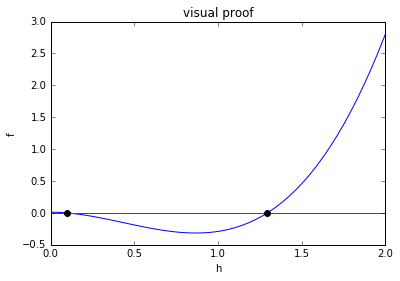

In [70]:
# YOUR CODE HERE
x = numpy.linspace(0, 2)
y = f(x)
s0 = bisection(brackets[0])[0]
s1 = bisection(brackets[1])[0]

n0 = newton(brackets[0][0])[0]
n1 = newton(brackets[1][0])[0]

plt.plot(x, y)
plt.plot(x, numpy.zeros(x.shape[0]))
plt.plot([s0, s1], [f(s0), f(s1)], 'ko')
plt.plot([n0, n1], [f(n0), f(n1)], 'ko')
plt.xlabel('h')
plt.ylabel('f')
plt.title("visual proof")

**(d)** [6] Now compare the convergence of the methods you wrote.  Plot the tolerance vs. the number of steps used to reach the tolerance for both the bisection method and Newton's method you implemented.  Comment on the results.  Make sure to label the axis, use a title, and provide a legend.

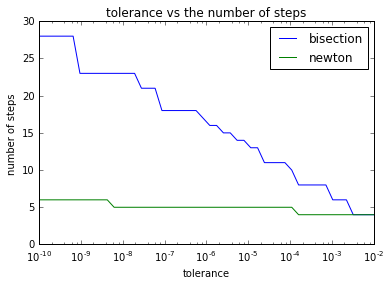

In [75]:
# YOUR CODE HERE
tol = 10**(-numpy.linspace(2, 10))
numIterBisec = [bisection(brackets[0], tolerance=x)[1] for x in tol]

numIterNewton = [newton(brackets[0][0], tolerance=x)[1] for x in tol]

plt.semilogx(tol, numIterBisec)
plt.semilogx(tol, numIterNewton)
plt.xlabel("tolerance")
plt.ylabel("number of steps")
plt.title("tolerance vs the number of steps")
plt.legend(["bisection", "newton"])

# raise NotImplementedError()

Answer:

From above plot, we can see that with increasing tolerance, both methods use fewer steps.
However, the number of steps decrease much more for bisection than for the newton method.
Tolerance has much more impact on the number of steps of bisection than on the newton method.


## Question 3
Given two functions $f(x)$ and $g(x)$ and their interpolants $\mathcal{P}_n(x)$ and $\mathcal{Q}_m(x)$ respectively determine the following analytically given that $n \geq m$.

**(a)** [10] Let $x_i \in X_f$ be the coordinates that define $\mathcal{P}_n(x)$ and $x_j \in X_g$ be the coordinates that define $\mathcal{Q}_m(x)$.  What conditions on the $X_f$, $X_g$, $n$ and $m$ must we place on these such that $\mathcal{P}_n(x) + \mathcal{Q}_m(x)$ is the interpolating polynomial for $f(x) + g(x)$?

YOUR ANSWER HERE

**(b)** [5] Given the previous constraints on $X_f$, $X_g$, $n$ and $m$, find the order of the interpolating polynomial $\mathcal{P}_n(x) + \mathcal{Q}_m(x)$ and an error bound.

YOUR ANSWER HERE

**(c)** [10] Let $x_i \in X_f$ be the coordinates that define $\mathcal{P}_n(x)$ and $x_j \in X_g$ be the coordinates that define $\mathcal{Q}_m(x)$.  What condition on the $X_f$, $X_g$, $n$ and $m$ must we place on these such that $\mathcal{P}_n(x) \cdot \mathcal{Q}_m(x)$ is the interpolating polynomial for $f(x) \cdot g(x)$

YOUR ANSWER HERE

## Question 4

[25] You are an instructor tasked with explaining how floating point error can enter into numerical approximations in a given field (choose your favorite).  Outline a short lecture (~10 minutes) making sure to relate it to your field of choice and find two illustrative examples.  Here we are looking for specific examples from your own field and how you might relate the issues faced to your interests.  Whichever field you do address make sure to define the problems of interest.  You are of course free to use the lecture notes as jumping off-point but make sure to relate to your topic of interest.  Given the open ended nature of this problem feel free to ask the TAs or instructor questions about appropriate scope and anything else that comes up.

YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()